In [1]:
import teacher_model as tm
import quantum_computer as qc
import quantum_trainer as qt
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

In [2]:
# Define my teacher model
my_teacher_model = tm.TeacherModel(verbose=False)
my_teacher_model.config(select_model="quad", x_lower_limit=-0.99, x_upper_limit=0.99, number_of_points=20, a=1.0, b=0, c=0)
#my_teacher_model.plot_model()

Note: Training Data is initialized


In [3]:
# Define quatnum_computer

# Data Encoding
my_quantum_encoding = qc.QuantumEncoding(verbose=False)
my_quantum_encoding.config(select_encoding="rzacos_ryasin")

# Entangling block
my_entangling = qc.HamlitonianMixerBlock(verbose=False)

# Single qubit rotation block
my_parameterised = qc.SingleQubitRotationBlock(verbose=False)

# Quantum Measurement
my_measurement = qc.QuantumMeasurement(verbose=False)
my_measurement.config(select_measurement = "first_qubit_Z")

# Package all components into a quantum computer
my_quantum_computer = qc.QuantumComputer(verbose=False)
my_quantum_computer.config(number_of_qubits=2, depth=2) 
my_quantum_computer.inputs(Encode=my_quantum_encoding, A=my_entangling, B=my_parameterised, Observable=my_measurement)

In [4]:
# Define quantum trainer
my_trainer = qt.QuantumTrainer(verbose=False)
my_trainer.config(select_optimiser = "GD", select_loss="sobolev_loss", max_training_steps=5, learning_rate=0.01)
my_trainer.inputs(my_teacher_model, my_quantum_computer)

In [5]:
my_trainer.train()

71.13014385209124
20.399573085554756
9.445781623262276
10.20952617360318
9.583042107737501
a = -0.025099093104756443


In [6]:
# predict_y = []
# for data_iter in range(20):
#     predict_result = my_quantum_computer.run_qc(my_teacher_model.training_data["x_data"][data_iter])
#     predict_y.append(predict_result["output_data"])
    
# fig1, ax1 = plt.subplots(dpi=100)
# ax1.scatter(my_teacher_model.training_data["x_data"], 0.30964653749481913 * np.asarray(predict_y),label="Quantum Model")
# y = np.square(my_teacher_model.training_data["x_data"]) 
# ax1.plot(my_teacher_model.training_data["x_data"],y,label="Teacher Model")
# ax1.set_ylabel(r"$f(x)$")
# ax1.set_xlabel(r"$x$")
# ax1.legend()
# fig1.suptitle("Quantum Circuit Learning\n Quadratic Model")

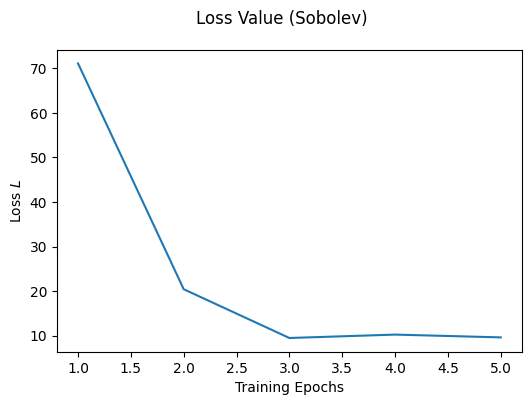

In [7]:
my_trainer.quantum_result_store.plot_loss()